In [1]:
import os
import copy
from matplotlib import pyplot as plt
from cascade.cascade import Cascade
import numpy as np
import cmocean

# B3D Only: Outwash module set to false

In [2]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_b3d_only = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation-left-mMHW.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-meters.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=False,
    alongshore_section_count=1,
    time_step_count=11,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 10,
    ki_value=9.6E-3,
    cx=0.65
)

In [3]:
for time_step in range(cascade_b3d_only._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_b3d_only.update()
    if cascade_b3d_only.b3d_break:
        break

 Time Step:  9

In [4]:
cascade_b3d_only.barrier3d[0].BermEl

0.154

Text(0, 0.5, 'shoreline position')

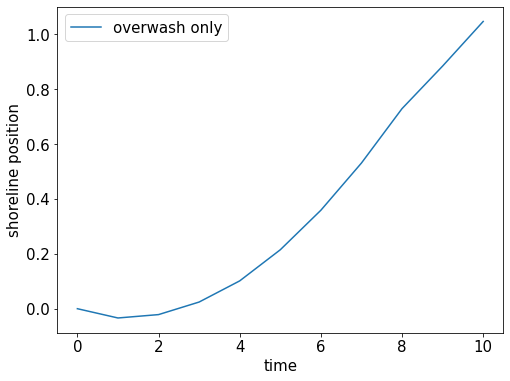

In [5]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

m_xsTS = np.subtract(cascade_b3d_only.barrier3d[0].x_s_TS, cascade_b3d_only.barrier3d[0].x_s_TS[0])
m_xsTS = np.multiply(m_xsTS,10)

plt.plot(m_xsTS, label="overwash only")
plt.legend()
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.savefig(newpath + "shoreline_position", facecolor='w')

In [6]:
# interior
initial_domain = cascade_b3d_only.barrier3d[0]._DomainTS[0]
domain1 = cascade_b3d_only.barrier3d[0]._DomainTS[1]
domain5 = cascade_b3d_only.barrier3d[0]._DomainTS[5]
domain10 = cascade_b3d_only.barrier3d[0]._DomainTS[10]
# dunes
initial_dunes = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[0])
dune_domain1 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[1])
dune_domain5 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[5])
dune_domain10 = np.transpose(cascade_b3d_only.barrier3d[0]._DuneDomain[10])
# full domains
intial_full = np.vstack([initial_dunes, initial_domain])
full_domain1 = np.vstack([dune_domain1, domain1])
full_domain5 = np.vstack([dune_domain5, domain5])
full_domain10 = np.vstack([dune_domain10, domain10])

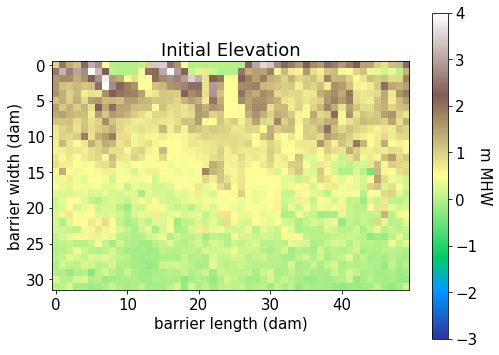

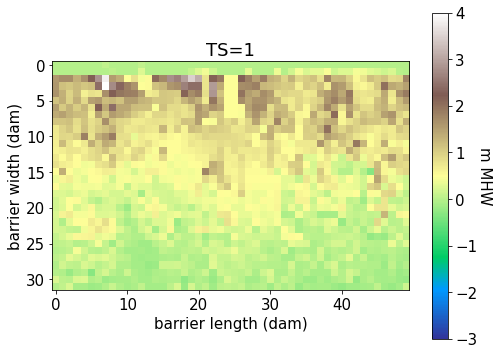

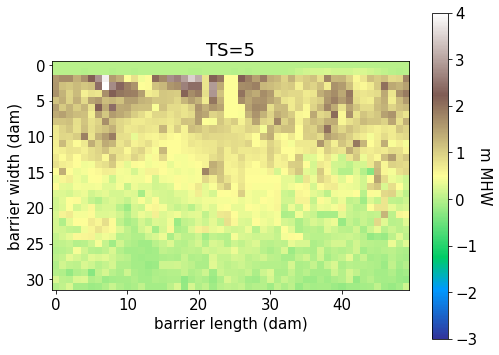

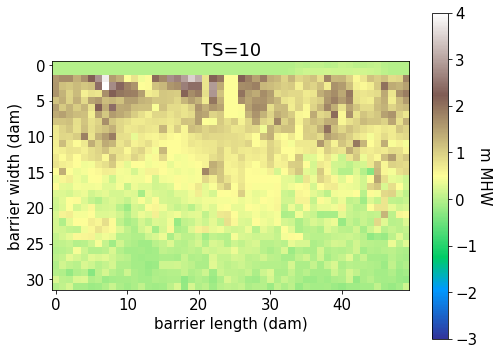

In [7]:
# plotting intial
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    intial_full,
    cmap="terrain",
#     vmin=0, vmax=5.0,
    vmin=-3.0, vmax=4.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting domain 1
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain1[:, :],
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=1")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 5
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain5[:, :],
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=5")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain 10
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain10[:, :],
    cmap="terrain",
    vmin=-3.0, vmax=4.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=10")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

In [20]:
from scripts.outwash_ms.plotters_outwash import plot_dune_domain, plot_ShorelinePositions

ImportError: cannot import name 'plot_dune_domain' from 'scripts.outwash_ms.plotters_outwash' (c:\users\lexi\pycharmprojects\cascade\scripts\outwash_ms\plotters_outwash.py)

# Outwash every 10 years

In [ ]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash100 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation2.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-NAVD88.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=100,
    outwash_beach_file = "NCB-default-beach-left-mod.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 10,
    ki_value=9.6E-3,
    cx=0.65
)

In [ ]:
for time_step in range(cascade_outwash100._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash100.update()
    if cascade_outwash100.b3d_break:
        break

In [ ]:
m_xsTS_100 = np.subtract(cascade_outwash100.barrier3d[0].x_s_TS, cascade_outwash100.barrier3d[0].x_s_TS[0])
m_xsTS_100 = np.multiply(m_xsTS_100,10)

plt.plot(m_xsTS_100)
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")


In [ ]:
# initial_domain = cascade_outwash100.outwash[0]._initial_full_domain
# final_domain = cascade_outwash100.outwash[0]._full_domain


plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams.update({"font.size": 15})

# interiors 
initial_domain = cascade_outwash100.barrier3d[0]._DomainTS[0]
domain9 = cascade_outwash100.barrier3d[0]._DomainTS[9]
domain10 = cascade_outwash100.barrier3d[0]._DomainTS[10]
domain11 = cascade_outwash100.barrier3d[0]._DomainTS[11]

domain19 = cascade_outwash100.barrier3d[0]._DomainTS[19]
domain20 = cascade_outwash100.barrier3d[0]._DomainTS[20]
domain21 = cascade_outwash100.barrier3d[0]._DomainTS[21]

domain29 = cascade_outwash100.barrier3d[0]._DomainTS[29]
domain30 = cascade_outwash100.barrier3d[0]._DomainTS[30]
# domain31 = cascade_outwash100.barrier3d[0]._DomainTS[31]

# dunes
initial_dunes = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[0])
dune_domain9 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[9])
dune_domain10 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[10])
dune_domain11 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[11])

dune_domain19 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[19])
dune_domain20 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[20])
dune_domain21 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[21])

dune_domain29 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[29])
dune_domain30 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[30])
# dune_domain11 = np.transpose(cascade_outwash100.barrier3d[0]._DuneDomain[11])


# full domains
intial_full = np.vstack([initial_dunes, initial_domain])
full_domain9 = np.vstack([dune_domain9, domain9])
full_domain10 = np.vstack([dune_domain10, domain10])
full_domain11 = np.vstack([dune_domain11, domain11])

full_domain19 = np.vstack([dune_domain19, domain19])
full_domain20 = np.vstack([dune_domain20, domain20])
full_domain21 = np.vstack([dune_domain21, domain21])

full_domain29 = np.vstack([dune_domain29, domain29])
full_domain30 = np.vstack([dune_domain30, domain30])
# full_domain9 = np.vstack([dune_domain9, domain9])

In [ ]:
### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
# fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
mat = ax1.matshow(
    intial_full*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    full_domain9[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("TS=9")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain10*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=10")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain11*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=11")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)


fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain19*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=19")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain20*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=20")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain21*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=21")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)



fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain29*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=29")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    full_domain30*10,
    cmap="terrain",
    vmin=-3.0, vmax=6.0,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("TS=30")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# fig3 = plt.figure()
# ax3 = fig3.add_subplot(111)
# mat3 = ax3.matshow(
#     domain31*10,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# ax3.set_xlabel('barrier length (dam)')
# ax3.set_ylabel('barrier width (dam)')
# ax3.set_title("TS=31")
# plt.gca().xaxis.tick_bottom()
# cbar = fig3.colorbar(mat3)
# cbar.set_label('meters', rotation=270, labelpad=15)

In [ ]:
plt.plot(m_xsTS, label="overwash only")
plt.plot(m_xsTS_100, label="100% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
# plt.ylim([500, 580])
plt.legend()
plt.title("Outwash to Shoreface")



# 50% Outwash to shoreface

In [ ]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash50 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation2.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-NAVD88.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=50,
    outwash_beach_file = "NCB-default-beach-left-mod.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 10,
    ki_value=9.6E-3,
    cx=0.65
)

In [ ]:
for time_step in range(cascade_outwash50._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash50.update()
    if cascade_outwash50.b3d_break:
        break

In [ ]:
m_xsTS_50 = np.subtract(cascade_outwash50.barrier3d[0].x_s_TS, cascade_outwash50.barrier3d[0].x_s_TS[0])
m_xsTS_50 = np.multiply(m_xsTS_50,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# washout lost

In [ ]:
datadir = "C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/"  # input datadir, add the default b3d files here
cascade_outwash0 = Cascade(
    datadir, 
    name="default",  
    elevation_file="NCB-default-elevation2.npy",  # if using different elevation file, change this before "-elevation.npy"
    dune_file="NCB-default-dunes-left-NAVD88.npy",
    parameter_file="outwash-parameters.yaml",
    storm_file="cascade-default-storms.npy",  # same as "StormSeries_1kyrs_VCR_Berm1pt9m_Slope0pt04_01.npy"
    num_cores=1,  # cascade can run in parallel, can never specify more cores than that
    roadway_management_module=False,
    alongshore_transport_module=False,
    beach_nourishment_module=False,
    community_economics_module=False,
    outwash_module=True,
    alongshore_section_count=1,
    time_step_count=101,
    wave_height=1, # ---------- for BRIE and Barrier3D --------------- #
    wave_period=7,
    wave_asymmetry=0.8,
    wave_angle_high_fraction=0.2,
    bay_depth=3.0,
    s_background=0.001,
    berm_elevation=1.46,
    MHW=0.36,
    beta=0.03,
    sea_level_rise_rate=0.004,
    sea_level_rise_constant=True,
    background_erosion=0.0,
    min_dune_growth_rate=0.25,
    max_dune_growth_rate=0.65,
    road_ele=1.7,  # ---------- roadway management --------------- #
    road_width=30,
    road_setback=30,
    dune_design_elevation=3.7,
    dune_minimum_elevation=2.2,
    trigger_dune_knockdown=False,
    group_roadway_abandonment=None,
    nourishment_interval=None, # ---------- beach and dune ("community") management --------------- #
    nourishment_volume=300.0,
    overwash_filter=40,
    overwash_to_dune=10,
    number_of_communities=1, # ---------- coastal real estate markets (in development) --------------- #
    sand_cost=10,
    taxratio_oceanfront=1,
    external_housing_market_value_oceanfront=6e5,
    external_housing_market_value_nonoceanfront=4e5,
    fixed_cost_beach_nourishment=2e6,
    fixed_cost_dune_nourishment=2e5,
    nourishment_cost_subsidy=10e6,
    house_footprint_x=15,
    house_footprint_y=20,
    beach_full_cross_shore=70,
    outwash_storms_file="outwash_storms_6min.npy",  # --------- outwasher (in development) ------------ #
    percent_washout_to_shoreface=0,
    outwash_beach_file = "NCB-default-beach-left-mod.npy",
    dune_flow_dynamics="full",
    outwasher_substep = 10,
    ki_value=9.6E-3,
    cx=0.65
)

In [ ]:
for time_step in range(cascade_outwash0._nt - 1):
    # Print time step to screen (NOTE: time_index in each model is time_step+1)
    print("\r", "Time Step: ", time_step, end="")
    cascade_outwash0.update()
    if cascade_outwash0.b3d_break:
        break

In [ ]:
m_xsTS_0 = np.subtract(cascade_outwash0.barrier3d[0].x_s_TS, cascade_outwash0.barrier3d[0].x_s_TS[0])
m_xsTS_0 = np.multiply(m_xsTS_0,10)

# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=580, colors='r', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")

plt.plot(m_xsTS, label="B3D only")
plt.plot(m_xsTS_100, label="100% washout")
plt.plot(m_xsTS_50, label="50% washout")
plt.plot(m_xsTS_0, label="0% washout")
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=580, colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("shoreline position")
plt.legend()
# plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\shoreface_nourishment_comparison_substep20.png", facecolor='w')

# plotting Qow

In [ ]:
OWTS = cascade_b3d_only.barrier3d[0].QowTS #m3/m
OWTS2 = cascade_outwash100.barrier3d[0].QowTS #m3/m
OWTS3 = cascade_outwash50.barrier3d[0].QowTS #m3/m
OWTS4 = cascade_outwash0.barrier3d[0].QowTS #m3/m

plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams.update({"font.size": 15})

plt.plot(OWTS, label="B3D only")
plt.plot(OWTS2, linestyle="dashed", label="100% washout")
plt.plot(OWTS3, linestyle="dashed", label="50% washout")
plt.plot(OWTS4, linestyle="dashed", label="0% washout")
# plt.plot(OWTS3, label="Outwash every 20 years")
# plt.vlines(years3-1, ymin=min(m_xsTS3), ymax=max(m_xsTS3), colors='r', linestyles='dotted')
# plt.vlines(years-1, ymin=min(m_xsTS), ymax=max(m_xsTS), colors='k', linestyles='dotted')
plt.xlabel("time")
plt.ylabel("overwash flux [$m^3/m$]")
plt.legend()
plt.title("Overwash")

In [ ]:
# sfTS = b3d.s_sf_TS #m3/m
# sfTS2 = b3d2.s_sf_TS #m3/m
# sfTS3 = b3d3.s_sf_TS #m3/m

# plt.plot(sfTS2, label="B3D only")
# plt.plot(sfTS, label="Outwash every 10 years")
# plt.plot(sfTS3, label="Outwash every 20 years")

# plt.xlabel("time")
# plt.ylabel("shoreface slope")
# # plt.savefig(newpath + "shoreline_position", facecolor='w')
# plt.legend()
# # plt.savefig(r"D:\NC State\Outwasher\Output\newest_flow_routing\overwash_comparison_substep20.png", facecolor='w')

In [ ]:
# plt.rcParams['figure.figsize'] = (8,6)
# plt.rcParams.update({"font.size": 15})

# dune_min1 = []
# dune_max1 = []
# dune_avg1 = []
# dune_min2 = []
# dune_max2 = []
# dune_avg2 = []
# dune_min3 = []
# dune_max3 = []
# dune_avg3 = []

# for t in range(101):
#     # b3d only
#     sub_domain2 = b3d2._DuneDomain[t, :, :]
#     crest2 = sub_domain2.max(axis=1)
#     dune_min2.append(min(crest2))
#     dune_max2.append(max(crest2))
#     dune_avg2.append(np.mean(crest2))
#     # outwash 10 years
#     sub_domain1 = b3d._DuneDomain[t, :, :]
#     crest1 = sub_domain1.max(axis=1)
#     dune_min1.append(min(crest1))
#     dune_max1.append(max(crest1))
#     dune_avg1.append(np.mean(crest1))
#     # outwash 20 years
#     sub_domain3 = b3d3._DuneDomain[t, :, :]
#     crest3 = sub_domain3.max(axis=1)
#     dune_min3.append(min(crest3))
#     dune_max3.append(max(crest3))
#     dune_avg3.append(np.mean(crest3))

# plt.figure(1)
# plt.plot(dune_min2, label = "B3D Only")
# plt.plot(dune_min1, label="Outwash every 10 years")
# plt.plot(dune_min3, label="Outwash every 20 years")
# plt.title("min dune crest heights")
# plt.xlabel("time")
# plt.legend()

# plt.figure(2)
# plt.plot(dune_max2, label = "B3D Only")
# plt.plot(dune_max1, label="Outwash every 10 years")
# plt.plot(dune_max3, label="Outwash every 20 years")
# plt.title("max dune crest heights")
# plt.xlabel("time")
# plt.legend()

# plt.figure(3)
# plt.plot(dune_avg2, label = "B3D Only")
# plt.plot(dune_avg1, label="Outwash every 10 years")
# plt.plot(dune_avg3, label="Outwash every 20 years")
# plt.title("avg dune crest heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

In [ ]:
# plt.rcParams['figure.figsize'] = (8,6)
# plt.rcParams.update({"font.size": 15})

# dune_min1 = []
# dune_max1 = []
# dune_avg1 = []
# dune_min2 = []
# dune_max2 = []
# dune_avg2 = []
# dune_min3 = []
# dune_max3 = []
# dune_avg3 = []

# for t in range(101):
#     # b3d only
#     sub_domain2 = b3d2._DuneDomain[t, :, :]
#     crest2 = sub_domain2[:,0]
#     dune_min2.append(min(crest2))
#     dune_max2.append(max(crest2))
#     dune_avg2.append(np.mean(crest2))
#     # outwash 10 years
#     sub_domain1 = b3d._DuneDomain[t, :, :]
#     crest1 = sub_domain1[:,0]
#     dune_min1.append(min(crest1))
#     dune_max1.append(max(crest1))
#     dune_avg1.append(np.mean(crest1))
#     # outwash 20 years
#     sub_domain3 = b3d3._DuneDomain[t, :, :]
#     crest3 = sub_domain3[:,0]
#     dune_min3.append(min(crest3))
#     dune_max3.append(max(crest3))
#     dune_avg3.append(np.mean(crest3))

# plt.figure(1)
# plt.plot(dune_min2, label = "B3D Only")
# plt.plot(dune_min1, label="Outwash every 10 years")
# plt.plot(dune_min3, label="Outwash every 20 years")
# plt.title("min dune heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

# plt.figure(2)
# plt.plot(dune_max2, label = "B3D Only")
# plt.plot(dune_max1, label="Outwash every 10 years")
# plt.plot(dune_max3, label="Outwash every 20 years")
# plt.title("max dune heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

# plt.figure(3)
# plt.plot(dune_avg2, label = "B3D Only")
# plt.plot(dune_avg1, label="Outwash every 10 years")
# plt.plot(dune_avg3, label="Outwash every 20 years")
# plt.title("avg dune heights")
# plt.xlabel("time")
# plt.legend(loc="upper right")

In [ ]:
# initial_dunes = np.multiply(np.transpose(b3d.DuneDomain[0]+b3d._BermEl),10)
# final_dunes = np.multiply(np.transpose(b3d.DuneDomain[100]+b3d._BermEl),10)
# initial_domain = np.multiply(b3d.DomainTS[0],10)
# final_domain = np.multiply(b3d.DomainTS[100],10)

# full_initial_domain = np.append(initial_dunes, initial_domain, 0)
# full_final_domain = np.flip(np.append(final_dunes, final_domain, 0),0)

# b3d_initial_domain = np.append(np.multiply(np.transpose(b3d2.DuneDomain[100]+b3d2._BermEl),10), np.multiply(b3d2.DomainTS[100],10), 0)
# b3d_final_domain = np.flip(np.append(np.multiply(np.transpose(b3d2.DuneDomain[100]+b3d2._BermEl),10), np.multiply(b3d2.DomainTS[100],10), 0),0)


In [ ]:
# ### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# # plotting initial domain
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     full_initial_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# # plotting post storm elevation
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     full_final_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Final Elevation")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')

In [ ]:
# ### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# # plotting initial domain
# fig1 = plt.figure()
# ax1 = fig1.add_subplot(111)
# # fig1, (ax1, ax3) = plt.subplots(1, 2, sharey=True)
# mat = ax1.matshow(
#     b3d_initial_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# cbar = fig1.colorbar(mat)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# ax1.set_title("Initial Elevation")
# ax1.set_ylabel("barrier width (dam)")
# ax1.set_xlabel("barrier length (dam)")
# plt.gca().xaxis.tick_bottom()
# fig1.savefig(newpath + "0_domain", facecolor='w')

# # plotting post storm elevation
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(111)
# mat2 = ax2.matshow(
#     b3d_final_domain,
#     cmap="terrain",
#     vmin=-3.0, vmax=3.0,
# )
# ax2.set_xlabel('barrier length (dam)')
# ax2.set_ylabel('barrier width (dam)')
# ax2.set_title("Final Elevation")
# plt.gca().xaxis.tick_bottom()
# cbar = fig2.colorbar(mat2)
# cbar.set_label('m MHW', rotation=270, labelpad=15)
# fig2.savefig(newpath + "final_domain", facecolor='w')